# Capstone Project - Interpreting Amazon Stock Prices

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the unprocessed dataset
amzn_data = pd.read_csv('https://raw.githubusercontent.com/xjvcm/cs131/main/MiniProjectGroup03/AMZN_data_1999_2022.csv')

## Metadata: Data Range

In [ ]:
# Start and End Date, Duration:
amzn_data['Date'] = pd.to_datetime(amzn_data['Date'])
start_date = amzn_data['Date'].min()
end_date = amzn_data['Date'].max()
duration = end_date - start_date

print('Start Date is', start_date)
print('End Date is', end_date)
print('Duration is', duration)

Start Date is 1999-01-04 00:00:00
End Date is 2022-12-30 00:00:00
Duration is 8761 days 00:00:00


## Metadata: Column-Specific Metadata

In [ ]:
# Column Names, Data Types, Non-Null Counts, Summary Statistics
amzn_data.info()
amzn_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6039 entries, 0 to 6038
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6039 non-null   datetime64[ns]
 1   Open       6039 non-null   float64       
 2   High       6039 non-null   float64       
 3   Low        6039 non-null   float64       
 4   Close      6039 non-null   float64       
 5   Adj Close  6039 non-null   float64       
 6   Volume     6039 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 330.4 KB


,Open,High,Low,Close,Adj Close,Volume
count,6039.000000,6039.000000,6039.000000,6039.000000,6039.000000,6.039000e+03
mean,33.032739,33.424013,32.598322,33.016059,33.016059,1.334297e+08
std,48.808735,49.374865,48.170554,48.767219,48.767219,1.147912e+08
min,0.295500,0.305000,0.275500,0.298500,0.298500,1.762600e+07
25%,2.267000,2.303500,2.226000,2.264250,2.264250,6.955200e+07
50%,8.675000,8.758500,8.576500,8.685500,8.685500,1.054160e+08
75%,41.047501,41.131498,40.737999,40.933750,40.933750,1.560990e+08
max,187.199997,188.654007,184.839493,186.570496,186.570496,2.086584e+09


## Metadata: Data Integrity and Quality

In [ ]:
# Missing/Null Values, Anomalies:
amzn_data.isnull().sum()
# For anomalies, more complex statistical analysis might be needed

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Metadata: Temporal Distribution

In [ ]:
# Frequency, Gaps
# Frequency is daily, excluding weekends and holidays
# For gaps:
amzn_data['Date'].diff().max()

Timedelta('7 days 00:00:00')

## Metadata: Volume Information

In [ ]:
# Volume Statistics
amzn_data['Volume'].describe()

count    6.039000e+03
mean     1.334297e+08
std      1.147912e+08
min      1.762600e+07
25%      6.955200e+07
50%      1.054160e+08
75%      1.560990e+08
max      2.086584e+09
Name: Volume, dtype: float64

## Metadata: Price Fluctuation

In [ ]:
# Trends, Volatility, Historical Highs/Lows:
amzn_data[['Open', 'High', 'Low', 'Close']].describe()
# Volatility and trend analysis would require more complex calculations

,Open,High,Low,Close
count,6039.000000,6039.000000,6039.000000,6039.000000
mean,33.032739,33.424013,32.598322,33.016059
std,48.808735,49.374865,48.170554,48.767219
min,0.295500,0.305000,0.275500,0.298500
25%,2.267000,2.303500,2.226000,2.264250
50%,8.675000,8.758500,8.576500,8.685500
75%,41.047501,41.131498,40.737999,40.933750
max,187.199997,188.654007,184.839493,186.570496


## Metadata: Adjusted Close Analysis

In [ ]:
# Comparisons, Impact of Corporate Actions
# Compare 'Close' and 'Adjusted Close'
amzn_data[['Close', 'Adj Close']].describe()

,Close,Adj Close
count,6039.000000,6039.000000
mean,33.016059,33.016059
std,48.767219,48.767219
min,0.298500,0.298500
25%,2.264250,2.264250
50%,8.685500,8.685500
75%,40.933750,40.933750
max,186.570496,186.570496


## Metadata: Correlation Analysis

In [ ]:
# Correlation between Metrics
amzn_data.corr()

<ipython-input-13-6995128a4eed>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  amzn_data.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999914,0.999892,0.999788,0.999788,-0.277425
High,0.999914,1.000000,0.999865,0.999898,0.999898,-0.276048
Low,0.999892,0.999865,1.000000,0.999903,0.999903,-0.278964
Close,0.999788,0.999898,0.999903,1.000000,1.000000,-0.277502
Adj Close,0.999788,0.999898,0.999903,1.000000,1.000000,-0.277502
Volume,-0.277425,-0.276048,-0.278964,-0.277502,-0.277502,1.000000


## Manipulated Dataset After Running Liux Commands

In [ ]:
# Load the dataset
amzn_data_processed = pd.read_csv('https://raw.githubusercontent.com/xjvcm/cs131/main/MiniProjectGroup03/out/amazon_date_close.csv')

# Convert the 'Date' column to datetime
amzn_data_processed['Date'] = pd.to_datetime(amzn_data['Date'])

## Closing Price Over Time

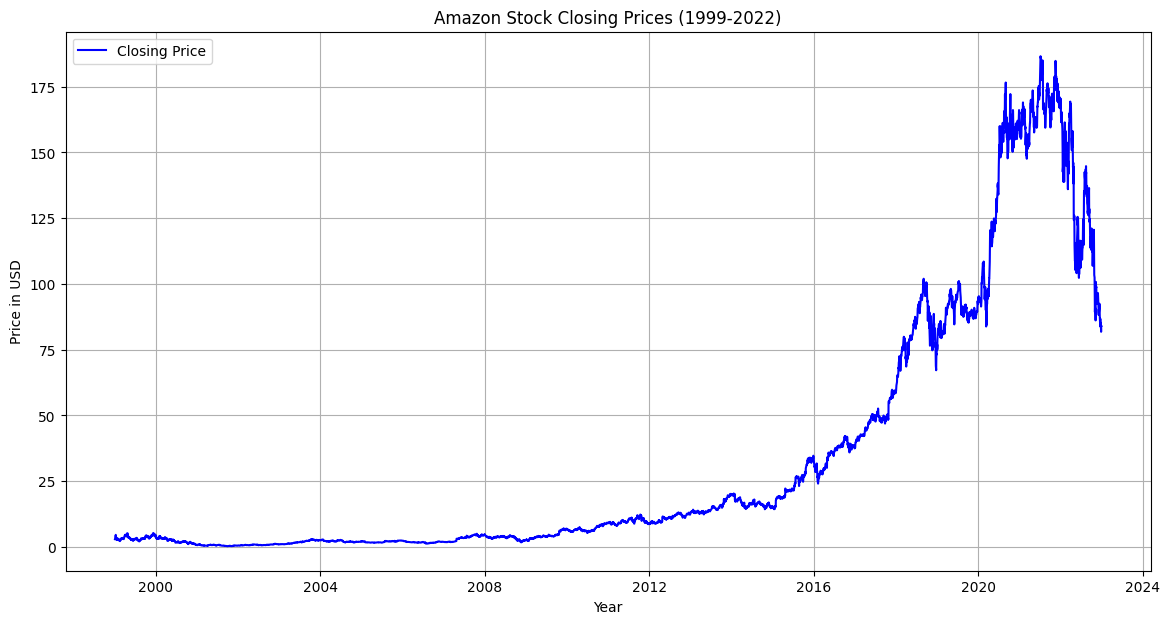

In [ ]:
# Plotting the Closing Price over time
plt.figure(figsize=(14, 7))
plt.plot(amzn_data_processed['Date'], amzn_data_processed['Close'], label='Closing Price', color='blue')
plt.title('Amazon Stock Closing Prices (1999-2022)')
plt.xlabel('Year')
plt.ylabel('Price in USD')
plt.legend()
plt.grid(True)
plt.show()

## Trading Volume Over Time

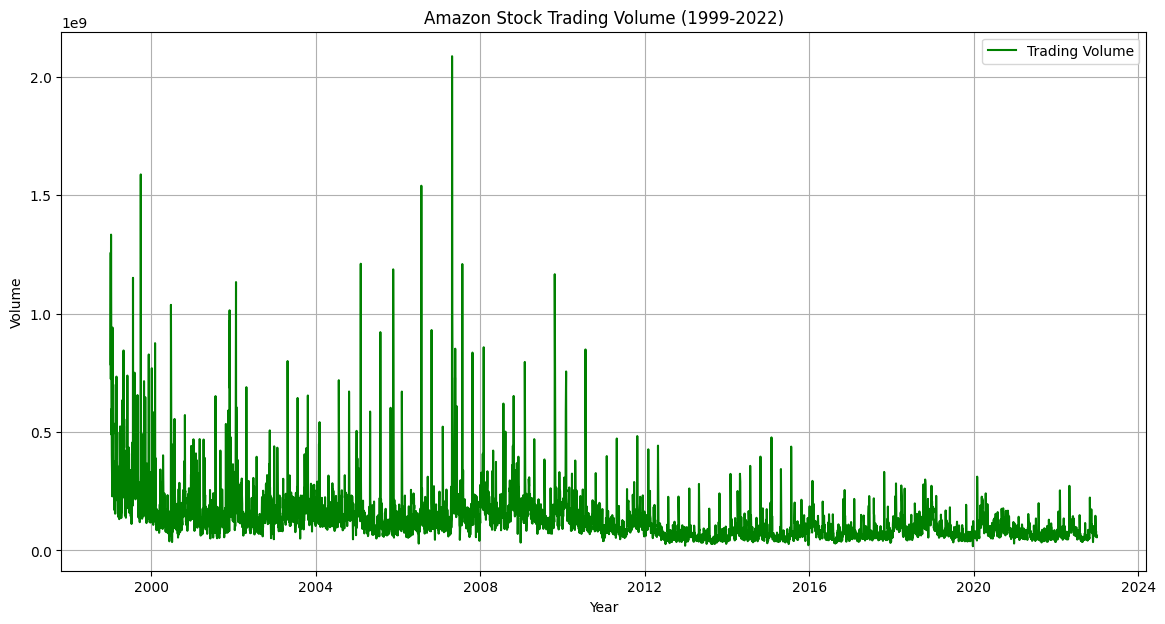

In [ ]:
# Plotting the Trading Volume over time
plt.figure(figsize=(14, 7))
plt.plot(amzn_data_processed['Date'], amzn_data_processed['Volume'], label='Trading Volume', color='green')
plt.title('Amazon Stock Trading Volume (1999-2022)')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

Text(0, 0.5, 'Volume')

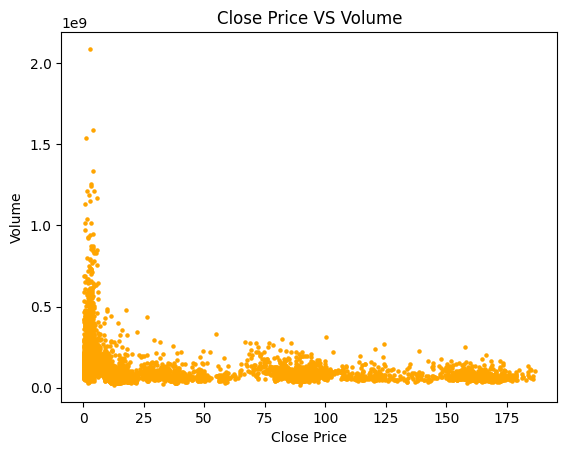

In [ ]:
plt.title('Close Price VS Volume')
plt.scatter(amzn_data_processed['Close'], amzn_data_processed['Volume'], color='orange', s=5)
plt.xlabel('Close Price')
plt.ylabel('Volume')

In [ ]:
amzn_data_processed

,Date,Close,Volume
0,1999-01-04,2.957813,785844000
1,1999-01-05,3.112500,1257464000
2,1999-01-06,3.450000,723532000
3,1999-01-07,3.971875,945492000
4,1999-01-08,4.006250,1333244000
...,...,...,...
6034,2022-12-23,85.250000,57433700
6035,2022-12-27,83.040001,57284000
6036,2022-12-28,81.820000,58228600
6037,2022-12-29,84.180000,54995900


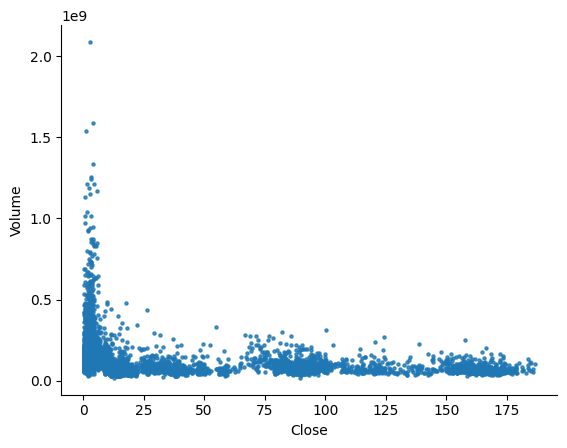

In [ ]:
from matplotlib import pyplot as plt
amzn_data_processed.plot(kind='scatter', x='Close', y='Volume', s=5, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)